# analasis con datos del conacyt
https://datos.covid-19.conacyt.mx/#DownZCSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

enfermos = pd.read_csv('Casos_Diarios_Estado_Nacional_Confirmados_20211222.csv', header=0, 
                       index_col=0, parse_dates=True, squeeze=True)
muertos = pd.read_csv('Casos_Diarios_Estado_Nacional_Defunciones_20211222.csv',  header=0, 
                       index_col=0, parse_dates=True, squeeze=True)
print(type(enfermos))
#print(enfermos.head(1))
dates = enfermos[0:0] # Las fechas estan en el renglon cero
dates = dates.columns.tolist()[2:] #leemos las columnas que son las fechas y las convertimos a list y cortamos los primero dos datos
#ahora que tenemos las fechas en una lista tenemos que cambiarlas a formato ISO-9000
#d = "20-02-2020"
#print(d[0:2])
#print(d[3:5])
#print(d[6:])
fechas_enfermos = [ d[6:]+"-"+d[3:5]+"-"+d[0:2] for d in dates] #convertimos fechas a formato ISO-9000
#for d in dates:
#    fechas_iso.append(d[6:]+"-"+d[3:5]+"-"+d[0:2])
#rint(fechas_enfermos[0])
#print(type(dates))
#print(len(dates))
#print(dates)

### Las fechas de muertos son diferentes a las fechas de enfermos por 15 dias.
dates = muertos[0:0].columns.tolist()[2:]
fechas_muertos = [ d[6:]+"-"+d[3:5]+"-"+d[0:2] for d in dates ]  #Convertimos fechas a ISO-9000
#print(fechas_muertos)
### Ahora obtenemos los datos de muertos y enfermos
enf = enfermos[32:].values.tolist() #valores nacionales de enfermos
enfermos = enf[0][2:]
muertos = muertos[32:].values.tolist()[0][2:]
print(len(muertos))
print(len(fechas_muertos))
## Calculamos los acumulados
acum_enfermos = np.cumsum(enfermos)
acum_muertos = np.cumsum(muertos)

a = [4,6,12]

print(np.cumsum(a))
#array([4, 10, 22])


<class 'pandas.core.frame.DataFrame'>
646
646
[ 4 10 22]


## Datos recuperados

In [2]:
print(f"Fecha Inicial de datos: {fechas_enfermos[0]}")
print(f"Fecha Final de datos: {fechas_enfermos[-1]}")
print(f"Numero total de enfermos: {acum_enfermos[-1]:,}")
print(f"Numero total de muertos: {acum_muertos[-1]:,}")
print(f"Ultimos siete dias de enfemos: {enfermos[-7:]}")
print(f"Ultimos siete dias de muertos: {muertos[-7:]}")

Fecha Inicial de datos: 2020-02-26
Fecha Final de datos: 2021-12-22
Numero total de enfermos: 3,940,401
Numero total de muertos: 298,359
Ultimos siete dias de enfemos: [2183, 1925, 777, 607, 2398, 1347, 7]
Ultimos siete dias de muertos: [84, 74, 89, 75, 50, 20, 1]


## Gráfica de enfermos acumulados totales

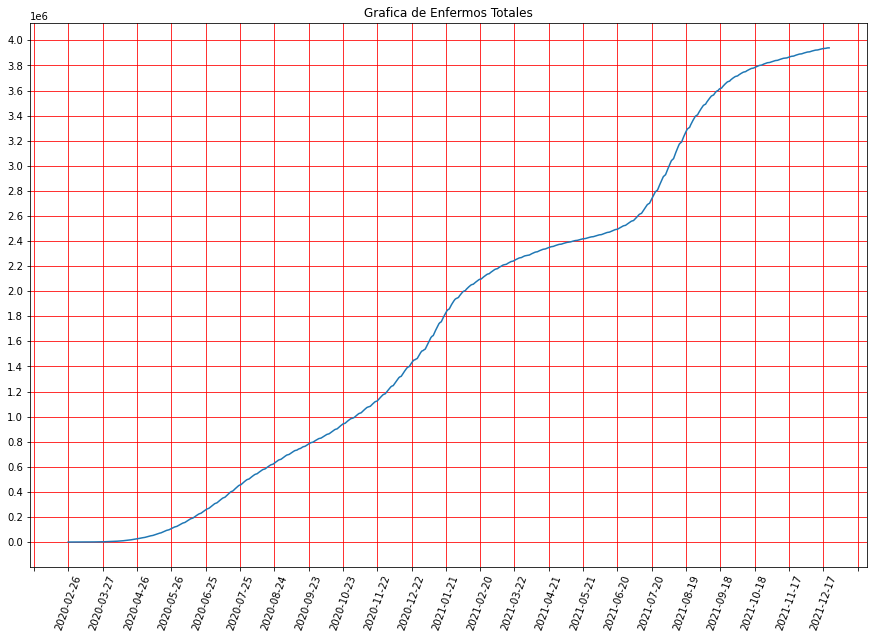

In [3]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(200000))
plt.xticks(rotation=70)
plt.grid(visible=True, color='r')
plt.title("Grafica de Enfermos Totales")
#plt.rcParams['figure.figsize'] = [20, 20] #inches
plt.plot(fechas_enfermos, acum_enfermos)

## Grafica de Muertos acumulados

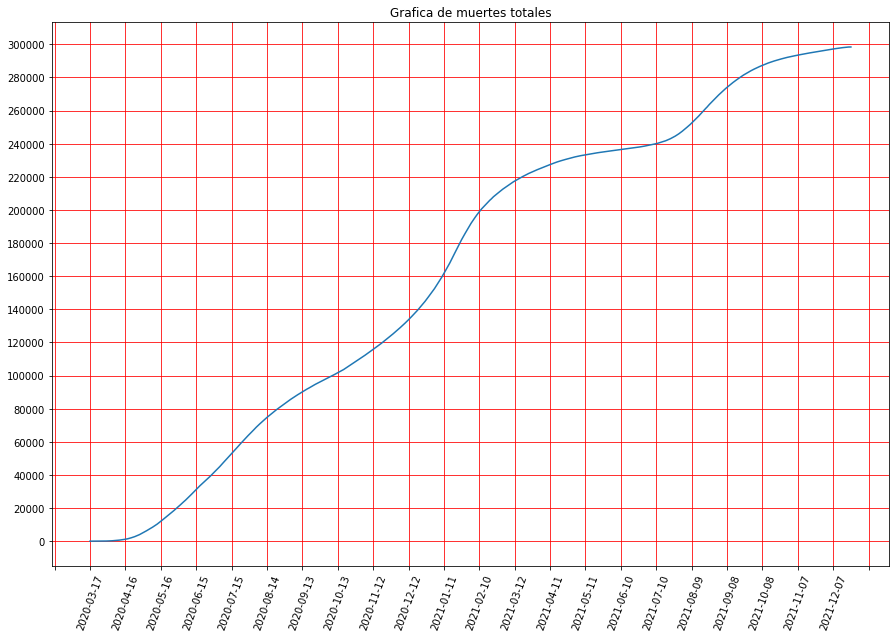

In [4]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20000))
plt.xticks(rotation=70)
plt.grid(visible=True, color='r')
plt.title("Grafica de muertes totales")
#plt.rcParams['figure.figsize'] = [20, 20] #inches
plt.plot(fechas_muertos, acum_muertos)

## Incremento diario de enfermos

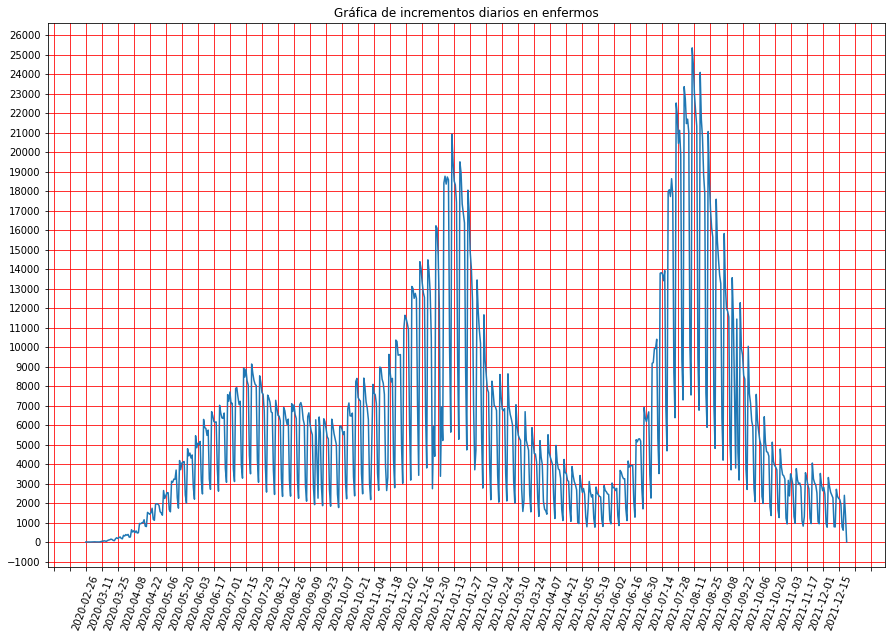

In [5]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(14))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1000))
plt.xticks(rotation=70)
plt.grid(visible=True, color='r')
plt.title("Gráfica de incrementos diarios en enfermos")
plt.plot(fechas_enfermos, enfermos)

## Incremento diario de muertos

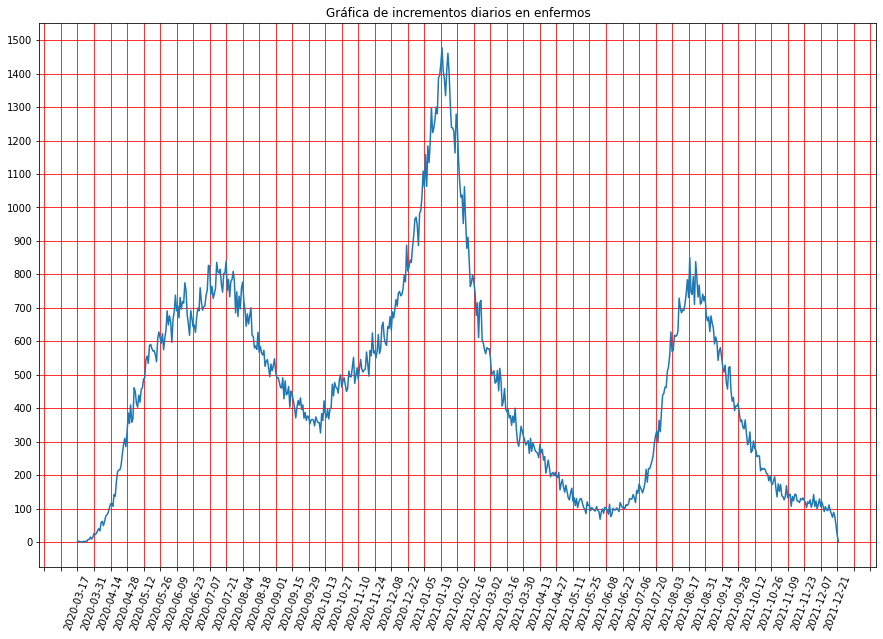

In [6]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(14))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(100))
plt.xticks(rotation=70)
plt.grid(visible=True, color='r')
plt.title("Gráfica de incrementos diarios en enfermos")
plt.plot(fechas_muertos, muertos)

In [14]:
### Obtenemos los incrementos
pasto_enfermos=[]
pasto_muertos=[]
#longitud=len(acum_enfermos)-1 #para no salirnos del indice
#print(longitud)
for i in range(0, len(acum_enfermos)-1):
    #pasto = b - a 
    pasto_enfermos.append(acum_enfermos[i+1]-acum_enfermos[i])
#ahora lo mismo para los muertos
for i in range(0, len(acum_muertos)-1):
    pasto_muertos.append(acum_muertos[i+1]-acum_muertos[i])

print(len(pasto_enfermos))
print(len(pasto_muertos))
print(len(fechas_enfermos[1:]))
print(len(fechas_muertos))

665
645
665
646


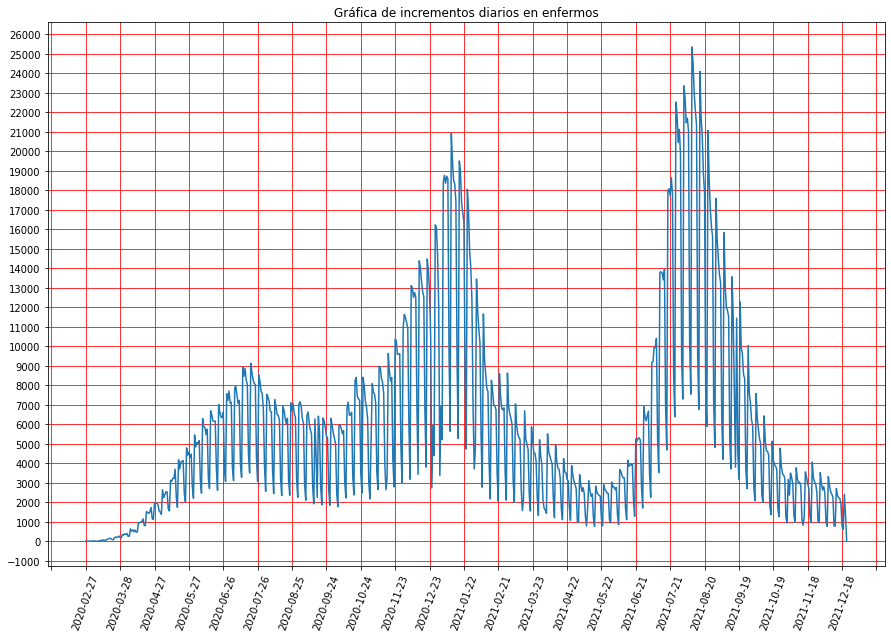

In [17]:
#Ahora Graficamos el incremento diario de enfermos
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1000))
plt.xticks(rotation=70)
plt.grid(visible=True, color='r')
plt.title("Gráfica de incrementos diarios en enfermos")
plt.plot(fechas_enfermos[1:], pasto_enfermos)

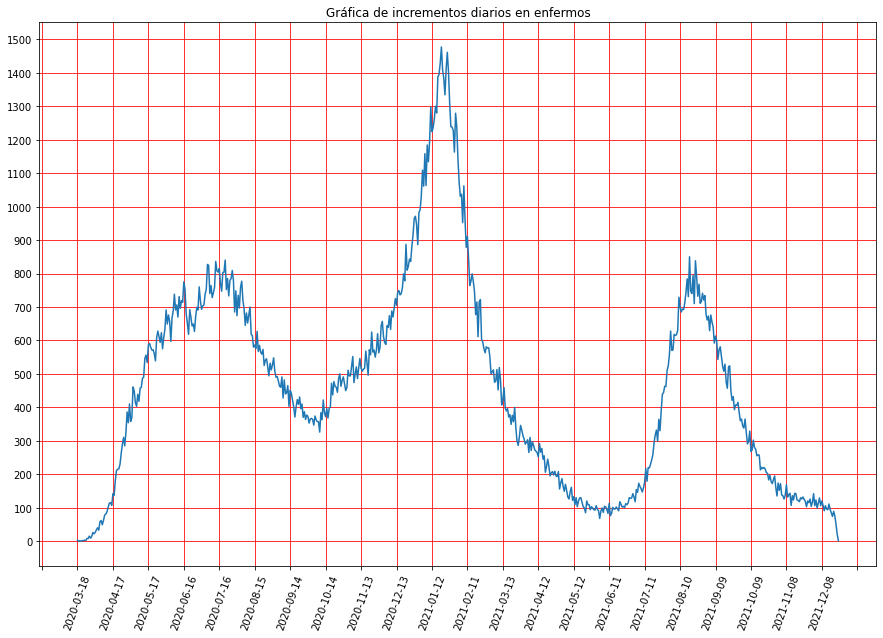

In [22]:
#Ahora Graficamos el incremento diario de muertos
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(100))
plt.xticks(rotation=70)
plt.grid(visible=True, color='r')
plt.title("Gráfica de incrementos diarios en enfermos")
plt.plot(fechas_muertos[1:], pasto_muertos)

In [ ]:
## Vamos a crear un archivo cvs para comparar los datos.
#Primero debemos crear diccionarios con la informacion y solo vamos
#a porder comparar hasta el 3 de diciembre que es donde dejaron de reportar

#guardamos la informacion en formato CSV para ser leida por excel
#excel_enfermos = pd.DataFrame.from_dict(d_enfermos, orient="index")
#excel_muertos = pd.DataFrame.from_dict(d_muertos, orient="index")
#excel_delta_enfermos = pd.DataFrame.from_dict(delta_enfermos, orient="index")
#excel_delta_muertos = pd.DataFrame.from_dict(delta_muertos, orient="index")

#Auqui guardamos la informacion en formato CSV
#excel_enfermos.to_csv("Total de enfermos.csv")
#excel_muertos.to_csv("Total de muertos.csv")
#excel_delta_enfermos.to_csv("Incremento en enfermos.csv")
#excel_delta_muertos.to_csv("Incremento en muertos.csv")